In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Variables

In [12]:
comunas_rm =  [13101, 15128, 14127, 14158, 14166, 14156, 16165, 14157, 13167, 16110, 16154, 16131, 15132,
    15108, 15161, 16164, 14155, 15151, 14109, 15105, 16162, 15152, 15103, 14111, 14114, 14107, 13159, 14113, 16106, 16163, 16153, 15160, 16301, 16401, 13134, 13135]

properties_columns = ['Comuna',
'Manzana',
'Predial',
'Numero correlativo',
'material estructural',
'Código de calidad de la línea de construcción',
'Año de la línea de construcción',
'Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción',
'Código de destino de la línea de construcción',
'Código de condición especial de la línea de construcción']

properties_info_columns = [
'Comuna',
'Manzana',
'Predial',
'Dirección',
'Avalúo fiscal total',
'Contribución semestral (con aseo)',
'Código de destino principal',
'Avalúo exento de la propiedad',
'Código SII de la Comuna Rol Bien Común 1',
'Número de Manzana Rol Bien Común 1',
'Número de predio Rol Bien Común 1',
'Código SII de la Comuna Rol Bien Común 2',
'Número de Manzana Rol Bien Común 2',
'Número de predio Rol Bien Común 2',
'Superficie total del terreno de la propiedad (sin decimales, en m2)']

In [13]:
len(comunas_rm)

36

## Tratamiento de datos

In [14]:
properties = pd.read_csv('BRORGA2441NL_NAC_2023_2.csv', encoding='latin-1', sep='|')
properties.columns = properties_columns

In [15]:
properties_df = properties.copy()
properties_df['rol'] = properties_df['Manzana'].astype(str) + '-' + properties_df['Predial'].astype(str)
properties_df['CM'] = properties_df['Comuna'].astype(str) + '-' + properties_df['Manzana'].astype(str)

In [16]:
properties_df

,Comuna,Manzana,Predial,Numero correlativo,material estructural,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",Código de destino de la línea de construcción,Código de condición especial de la línea de construcción,rol,CM
0,1101,1,4,2,E,3,1925,201,O,NaN,1-4,1101-1
1,1101,1,4,3,C,3,1925,91,O,NaN,1-4,1101-1
2,1101,1,5,1,B,4,1925,213,O,NaN,1-5,1101-1
3,1101,1,5,2,GB,2,1925,13,V,NaN,1-5,1101-1
4,1101,1,6,1,B,4,1925,69,O,NaN,1-6,1101-1
...,...,...,...,...,...,...,...,...,...,...,...,...
10441245,16404,90160,6,2,GC,2,1950,520,L,NaN,90160-6,16404-90160
10441246,16404,90160,6,3,GC,2,1962,240,V,NaN,90160-6,16404-90160
10441247,16404,90160,6,4,C,4,1962,25,T,NaN,90160-6,16404-90160
10441248,16404,90160,6,5,E,4,1962,12,V,NaN,90160-6,16404-90160


In [17]:
properties_info = pd.read_csv('BRORGA2441N_NAC_2023_2.csv', encoding='latin-1', sep='|')
properties_info.columns =  properties_info_columns

In [18]:
properties_info.head()

,Comuna,Manzana,Predial,Dirección,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
0,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566
1,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126
2,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025
3,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588
4,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211


In [19]:
properties_info_df = properties_info.copy()
properties_info_df['rol'] = properties_info_df['Manzana'].astype(str) + '-' + properties_info_df['Predial'].astype(str)
properties_info_df['CM'] = properties_info_df['Comuna'].astype(str) + '-' + properties_info_df['Manzana'].astype(str)

In [20]:
properties_info_df

,Comuna,Manzana,Predial,Dirección,Avalúo fiscal total,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)",rol,CM
0,1101,1,5,M LIRA 315,140818898,0,O,140818898,0,0,0,0,0,0,566,1-5,1101-1
1,1101,1,6,M LIRA 315,39537563,0,O,39537563,0,0,0,0,0,0,126,1-6,1101-1
2,1101,1,8,M LIRA S/N TERMINAL PESQUERO,1934907470,10322732,C,0,0,0,0,0,0,0,8025,1-8,1101-1
3,1101,1,10,MAXIMO LIRA 389,830168525,4428950,O,0,0,0,0,0,0,0,1588,1-10,1101-1
4,1101,1,12,TERMINAL PESQUERO,56253026,0,C,56253026,0,0,0,0,0,0,211,1-12,1101-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019049,16404,5087,27,G MARTINEZ V 217,15257408,0,H,15257408,0,0,0,0,0,0,78,5087-27,16404-5087
8019050,16404,5087,28,G MARTINEZ V 221,15257408,0,H,15257408,0,0,0,0,0,0,78,5087-28,16404-5087
8019051,16404,5087,29,G MARTINEZ V 225,15257408,0,H,15257408,0,0,0,0,0,0,78,5087-29,16404-5087
8019052,16404,5087,30,G MARTINEZ V 229,16800599,0,H,16800599,0,0,0,0,0,0,120,5087-30,16404-5087


In [21]:
properties_result = pd.merge(properties_df, properties_info_df, on=['rol', 'CM', 'Comuna', 'Manzana', 'Predial' ], how='inner')

In [22]:
properties_result

,Comuna,Manzana,Predial,Numero correlativo,material estructural,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",Código de destino de la línea de construcción,Código de condición especial de la línea de construcción,...,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
0,1101,1,5,1,B,4,1925,213,O,NaN,...,0,O,140818898,0,0,0,0,0,0,566
1,1101,1,5,2,GB,2,1925,13,V,NaN,...,0,O,140818898,0,0,0,0,0,0,566
2,1101,1,6,1,B,4,1925,69,O,NaN,...,0,O,39537563,0,0,0,0,0,0,126
3,1101,1,6,2,E,3,1925,57,O,NaN,...,0,O,39537563,0,0,0,0,0,0,126
4,1101,1,8,1,C,3,1973,255,C,NaN,...,10322732,C,0,0,0,0,0,0,0,8025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441243,16404,90160,6,2,GC,2,1950,520,L,NaN,...,0,T,1292859838,0,0,0,0,0,0,98055
10441244,16404,90160,6,3,GC,2,1962,240,V,NaN,...,0,T,1292859838,0,0,0,0,0,0,98055
10441245,16404,90160,6,4,C,4,1962,25,T,NaN,...,0,T,1292859838,0,0,0,0,0,0,98055
10441246,16404,90160,6,5,E,4,1962,12,V,NaN,...,0,T,1292859838,0,0,0,0,0,0,98055


In [23]:
properties_result = properties_result[properties_result['Comuna'].isin(comunas_rm)]

In [24]:
properties_result

,Comuna,Manzana,Predial,Numero correlativo,material estructural,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",Código de destino de la línea de construcción,Código de condición especial de la línea de construcción,...,Contribución semestral (con aseo),Código de destino principal,Avalúo exento de la propiedad,Código SII de la Comuna Rol Bien Común 1,Número de Manzana Rol Bien Común 1,Número de predio Rol Bien Común 1,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)"
5763448,13101,1,1,1,B,3,1955,64,C,NaN,...,617820,C,0,13101,1,90001,0,0,0,0
5763449,13101,1,1,2,B,3,1955,54,C,NaN,...,617820,C,0,13101,1,90001,0,0,0,0
5763450,13101,1,1,3,B,3,1955,64,C,SB,...,617820,C,0,13101,1,90001,0,0,0,0
5763451,13101,1,2,1,B,3,1955,32,C,NaN,...,300078,C,0,13101,1,90001,0,0,0,0
5763452,13101,1,2,2,B,3,1955,32,O,NaN,...,300078,C,0,13101,1,90001,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10358378,16401,8012,2,1,C,4,2000,50,H,NaN,...,0,H,26434828,0,0,0,0,0,0,80
10358379,16401,8012,3,1,C,4,2000,50,H,NaN,...,0,H,32281172,0,0,0,0,0,0,124
10358380,16401,8012,4,1,C,4,2000,50,H,NaN,...,0,H,33946270,0,0,0,0,0,0,134
10358381,16401,8012,5,1,C,4,2001,50,H,NaN,...,0,H,26732790,0,0,0,0,0,0,81


In [25]:
manzanas = pd.read_csv('manzanas_rm_AMS.csv', encoding='latin-1', sep=',')
# manzanas = pd.DataFrame(manzanas)
# manzanas= manzanas.rename(columns={'CMN_MZ': 'CM'})

In [16]:
manzanas

,COMUNA,MANZ_SII,NOM_COMUNA,CM,AREA,layer,path
0,14202,176.0,LAMPA,14202-176,NaN,ExtraÃ­dos,MultiPolygon?crs=EPSG:32719&field=COMUNA:strin...
1,14202,178.0,LAMPA,14202-178,NaN,ExtraÃ­dos,MultiPolygon?crs=EPSG:32719&field=COMUNA:strin...
2,14202,175.0,LAMPA,14202-175,NaN,ExtraÃ­dos,MultiPolygon?crs=EPSG:32719&field=COMUNA:strin...
3,14202,176.0,LAMPA,14202-176,NaN,ExtraÃ­dos,MultiPolygon?crs=EPSG:32719&field=COMUNA:strin...
4,14202,176.0,LAMPA,14202-176,NaN,ExtraÃ­dos,MultiPolygon?crs=EPSG:32719&field=COMUNA:strin...
...,...,...,...,...,...,...,...
51114,16402,49.0,NaN,16402-49,NaN,NaN,NaN
51115,16402,905.0,NaN,16402-905,NaN,NaN,NaN
51116,16402,907.0,NaN,16402-907,NaN,NaN,NaN
51117,16402,908.0,NaN,16402-908,NaN,NaN,NaN


In [17]:
properties_result = properties_result.reset_index('rol')
rm = pd.merge(properties_result, manzanas, on=['CM'], how='inner')

In [18]:
rm

,CM,rol,Comuna,Manzana_x,Predial_x,Numero correlativo,material estructural,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",...,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)",COMUNA,MANZ_SII,NOM_COMUNA,AREA,layer,path
0,13101-1,1-1,13101,1,1,1,B,3,1955,64,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
1,13101-1,1-1,13101,1,1,2,B,3,1955,54,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
2,13101-1,1-1,13101,1,1,3,B,3,1955,64,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
3,13101-1,1-2,13101,1,2,1,B,3,1955,32,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
4,13101-1,1-2,13101,1,2,2,B,3,1955,32,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310468,16165-15746,15746-18,16165,15746,18,1,C,4,1987,30,...,0,0,0,141,16165,15746.0,EL BOSQUE,2879.19067,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
3310469,16165-15746,15746-19,16165,15746,19,1,C,4,1987,48,...,0,0,0,157,16165,15746.0,EL BOSQUE,2879.19067,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
3310470,16165-15746,15746-19,16165,15746,19,2,C,3,2019,40,...,0,0,0,157,16165,15746.0,EL BOSQUE,2879.19067,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
3310471,16165-15746,15746-20,16165,15746,20,1,C,4,1987,49,...,0,0,0,192,16165,15746.0,EL BOSQUE,2879.19067,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...


### Estadísticas

In [19]:
#cambiar a provi o a otra comuna
#13101
rm_stats = rm[rm['Comuna'].isin([13101])]
rm_stats

,CM,rol,Comuna,Manzana_x,Predial_x,Numero correlativo,material estructural,Código de calidad de la línea de construcción,Año de la línea de construcción,"Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción",...,Código SII de la Comuna Rol Bien Común 2,Número de Manzana Rol Bien Común 2,Número de predio Rol Bien Común 2,"Superficie total del terreno de la propiedad (sin decimales, en m2)",COMUNA,MANZ_SII,NOM_COMUNA,AREA,layer,path
0,13101-1,1-1,13101,1,1,1,B,3,1955,64,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
1,13101-1,1-1,13101,1,1,2,B,3,1955,54,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
2,13101-1,1-1,13101,1,1,3,B,3,1955,64,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
3,13101-1,1-2,13101,1,2,1,B,3,1955,32,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
4,13101-1,1-2,13101,1,2,2,B,3,1955,32,...,0,0,0,0,13101,1.0,SANTIAGO CENTRO,3674.60730,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281521,13101-85007,85007-1,13101,85007,1,1,B,3,2008,38,...,0,0,0,2855,13101,85007.0,SANTIAGO CENTRO,33.33386,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
281522,13101-85007,85007-1,13101,85007,1,2,B,3,2008,265,...,0,0,0,2855,13101,85007.0,SANTIAGO CENTRO,33.33386,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
281523,13101-85007,85007-1,13101,85007,1,3,B,4,2008,304,...,0,0,0,2855,13101,85007.0,SANTIAGO CENTRO,33.33386,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...
281524,13101-85007,85007-1,13101,85007,1,4,B,4,2008,136,...,0,0,0,2855,13101,85007.0,SANTIAGO CENTRO,33.33386,Manzanas_Santiago,D:/TESIS PHD ING TRANSPORTES/InvestigaciÃ³n 1/...


Promedio de área de construcción por año

In [20]:

area_constr_años = rm_stats.groupby(['Año de la línea de construcción'])['Superficie de la línea de construcción sin decimales, en m2 o m3 según tipo de construcción'].mean()

<Axes: xlabel='Año de la línea de construcción'>

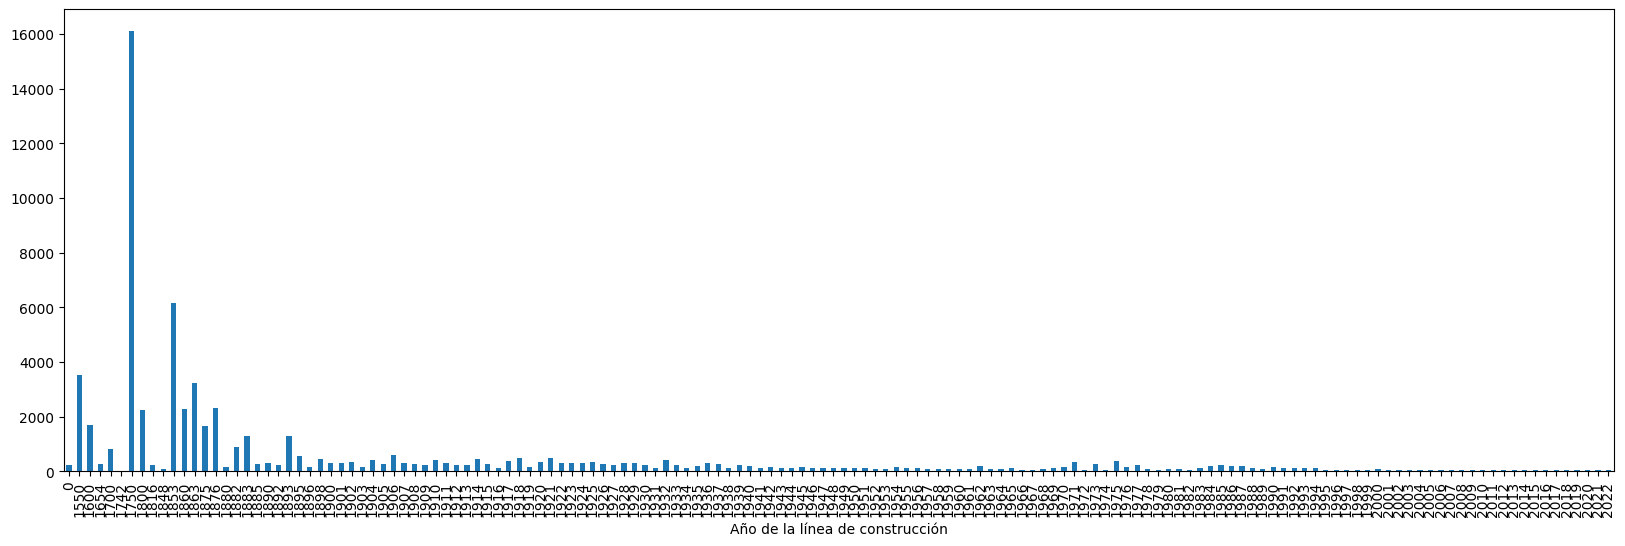

In [21]:
#plot area_constr_años
area_constr_años.plot(kind='bar', figsize=(20, 6))

In [22]:

moda_material = rm_stats['material estructural'].mode()
moda_material

0    B 
Name: material estructural, dtype: object

Distribución de Año de Construcción

/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_66253/2990841463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rm_stats['Año de la línea de construcción'] = rm_stats['Año de la línea de construcción'].astype(int)
/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_66253/2990841463.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rm_stats['Año de la línea de construcción'], b

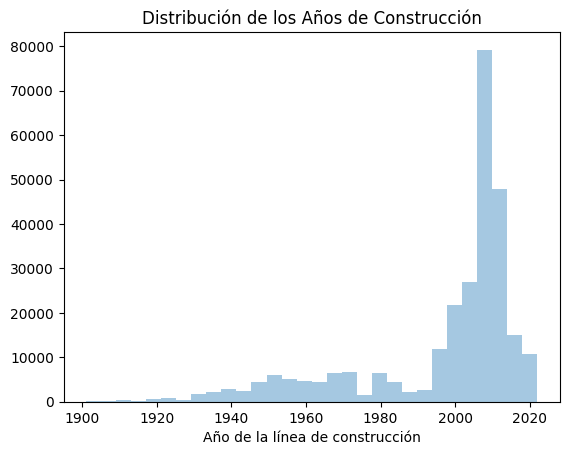

In [23]:
import seaborn as sns


# Asumiendo que tu dataframe se llama df
# acortar años de construccion
rm_stats['Año de la línea de construcción'] = rm_stats['Año de la línea de construcción'].astype(int)
rm_stats = rm_stats[rm_stats['Año de la línea de construcción'] > 1900]
sns.distplot(rm_stats['Año de la línea de construcción'], bins=30, kde=False)
plt.title('Distribución de los Años de Construcción')
plt.show()

Número de Propiedades por Material Estructural


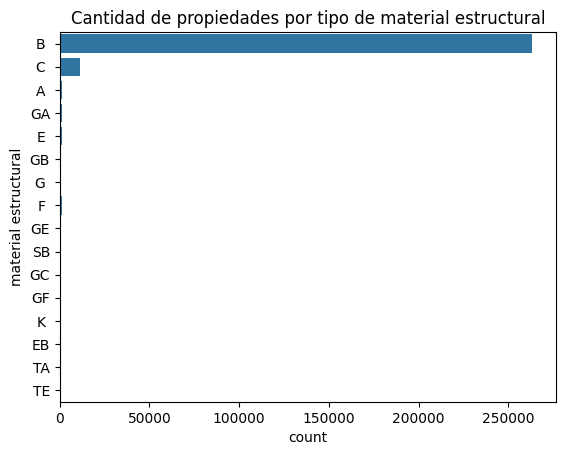

In [24]:
sns.countplot(rm_stats['material estructural'])
plt.title('Cantidad de propiedades por tipo de material estructural')
plt.show()


Distribución de Superficie Total del Terreno de Propiedad

/var/folders/b3/97rb_ll92zs13dv5h2p5chxh0000gn/T/ipykernel_66253/1608441296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rm_stats['Superficie total del terreno de la propiedad (sin decimales, en m2)'], bins=30, kde=False)


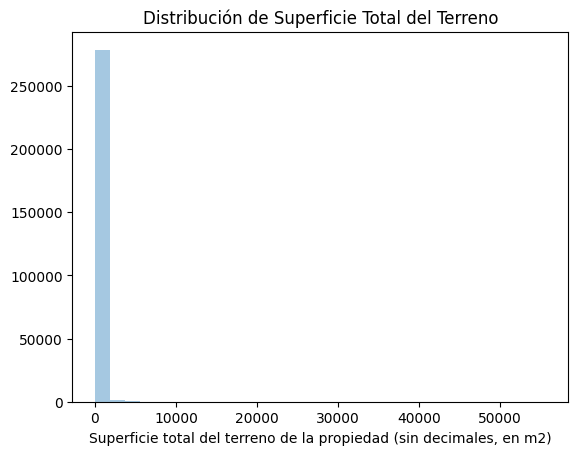

In [25]:
sns.distplot(rm_stats['Superficie total del terreno de la propiedad (sin decimales, en m2)'], bins=30, kde=False)
plt.title('Distribución de Superficie Total del Terreno')
plt.show()


Número de Propiedades por Calidad de Construcción


In [26]:
sns.countplot(rm_stats['Código de calidad de la línea de construcción'])
plt.title('Número de propiedades por código de calidad de construcción')
plt.show()
